# Transformation of Raw Scores Data


**This notebook is a part of Davor Penzar's *[ESC](http://eurovision.tv/) Score Predictor* project.**

Author: [Davor Penzar `<davor.penzar@gmail.com>`](mailto:davor.penzar@gmail.com)\
Date: $ 8 $<sup>th</sup> April $ 2021 $\
Version: `1.0`


This [*Jupyter notebook*](http://jupyter.org/) transforms raw scores data into the format that is used throughout the rest of the project.


## Table of Contents
<a class="anchor" id="sec-table-of-contents"></a>


1.  [Environment Preparation](#sec-environment-preparation)
2.  [Importing Raw Data](#sec-importing-raw-data)
3.  [Reduction of Unnecessary Data](#sec-reduction-of-unnecessary-data)
4.  [Adding Missing Years](#sec-adding-missing-years)
5.  [Names of Countries](#sec-names-of-countries)
6.  [Normalisation of Scores](#sec-normalisation-of-scores)
7.  [Number of Contestants](#sec-number-of-contestants)
8.  [Computing Additional Data](#sec-computing-additional-data)
9.  [Saving Transformed Data](#sec-saving-transformed-data)
10. [References](#sec-references)


## Environment Preparation
<a class="anchor" id="sec-environment-preparation"></a>


Import library&hellip;


In [1]:
# Import IPython.
from IPython import *
from IPython.display import *


In [2]:
# Import standard library.
import csv


In [3]:
# Import SciPy packages.
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
#import sympy as sym
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D


In [4]:
# Import other packages.
import tikzplotlib as tpl


In [5]:
# Import custom library.
import utils


Initial setup&hellip;


In [6]:
%matplotlib inline


In [7]:
#sym.init_printing()


In [8]:
plt.style.use('default')


**[*Python*](http://python.org/) version and versions of packages**

Output on the original machine:

```
Python version:
	3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
SciPy version: 1.5.0
NumPy version: 1.18.5
Pandas version: 1.0.5
Matplotlib version: 3.2.2
Tikzplotlib version: 0.9.6

```


In [9]:
print(
    "Python version:\n\t{v:s}".format(
        v = sys.version.strip().replace("\n", "\n\t")
    )
)
print("SciPy version: {v:s}".format(v = sp.__version__))
print("NumPy version: {v:s}".format(v = np.__version__))
print("Pandas version: {v:s}".format(v = pd.__version__))
print("Matplotlib version: {v:s}".format(v = mpl.__version__))
print("Tikzplotlib version: {v:s}".format(v = tpl.__version__))


Python version:
	3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
SciPy version: 1.5.2
NumPy version: 1.19.2
Pandas version: 1.1.3
Matplotlib version: 3.3.2
Tikzplotlib version: 0.9.8


## Importing Raw Data
<a class="anchor" id="sec-importing-raw-data"></a>


We shall import the raw data downloaded at [[3]](#bib-Okhuijsen2019) with minimal manipulation during the importing (see parameters `names` and `converters` in [`pd.read_excel` function](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) call below).


In [10]:
# Read data from the Excel spreadsheet.
df = pd.read_excel(
    'data/eurovision_song_contest_1975_2019v3.xlsx',
    sheet_name = 'Data',
    header = 0,
    names = [
        'year',
        'contest_level',
        'edition',
        'by',
        'from',
        'to',
        'points',
        'duplicate'
    ],
    index_col = None,
    converters = {
        'contest_level': (
            lambda l:
                'semifinal' if l.upper() in {'SF', 'SF1', 'SF2'}
                else 'final' if l.upper() == 'F'
                else None
        ),
        'by': (
            lambda s:
                'jury' if s.upper() == 'J'
                else 'televoting' if s.upper() == 'T'
                else None
        ),
        'duplicate': (
            lambda d:
                True if d.upper() == 'X'
                else False if not d
                else None
        )
    }
)

# Fix an error in the data (compare results from [3] to results from [1, 2]).
df.loc[(df.year == 2003) & (df.to == 'Lithuania'), 'to'] = 'Latvia'


The dataframe now holds information about scoring points in all contests (at all levels&mdash;both semifinal and final), as well as who gave them and who received them.


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49832 entries, 0 to 49831
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           49832 non-null  int64 
 1   contest_level  49832 non-null  object
 2   edition        49832 non-null  object
 3   by             49832 non-null  object
 4   from           49832 non-null  object
 5   to             49832 non-null  object
 6   points         49832 non-null  int64 
 7   duplicate      49832 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 2.7+ MB


In [12]:
df.sample(12, replace = False, random_state = 2020).sort_index()


,year,contest_level,edition,by,from,to,points,duplicate
3503,1984,final,1984f,jury,Sweden,Belgium,0,False
4988,1988,final,1988f,jury,Greece,Belgium,0,False
8071,1994,final,1994f,jury,France,Malta,0,False
8473,1994,final,1994f,jury,Switzerland,Poland,10,False
9305,1996,final,1996f,jury,Ireland,Poland,0,False
10921,1999,final,1999f,jury,Croatia,Israel,8,False
12992,2002,final,2002f,jury,Switzerland,Latvia,8,False
27536,2011,final,2011f,jury,Spain,Lithuania,1,False
30892,2013,final,2013f,jury,Israel,Greece,2,False
32326,2014,final,2014f,jury,Georgia,Spain,0,False


However, such detailed information is redundant. All we really need is how much each country scored in total. Furthermore, we are not interested in semifinals because score distribution would then be inconsistent and the consistency would be hard, if not impossible, to recreate.


## Reduction of Unnecessary Data
<a class="anchor" id="sec-reduction-of-unnecessary-data"></a>


We shall now simplify the dataframe in a more compact and useful format, as mentioned before.


In [13]:
# Drop unnecessary rows and columns.
df.dropna(axis = 0, how = 'any', inplace = True)
df.drop(
    df.index[df.contest_level != 'final'],
    axis = 0,
    inplace = True
)
df.drop(
    ['contest_level', 'edition', 'by', 'from', 'duplicate'],
    axis = 1,
    inplace = True
)

# Aggregate by the accumulated score.
df = df.groupby(
    ['to', 'year'],
    axis = 0,
    sort = False
).sum().reset_index(
    drop = False,
    inplace = False,
    col_fill = None
)
df.columns = ['country', 'year', 'score']
df.sort_values(
    ['year', 'country', 'score'],
    axis = 0,
    ascending = [True, True, False],
    inplace = True
)
df.reset_index(drop = True, inplace = True)

# Create a new dataframe to ensure its internal memory optimisation.
df = df.copy(deep = True)


Let us observe the current state of the dataframe.


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1032 non-null   object
 1   year     1032 non-null   int64 
 2   score    1032 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.3+ KB


In [15]:
df.sample(12, replace = False, random_state = 2020).sort_index()


,country,year,score
39,Finland,1977,50
297,Denmark,1990,64
318,Cyprus,1991,60
322,Germany,1991,10
352,Norway,1992,23
369,Germany,1993,18
386,Austria,1994,19
612,Israel,2003,17
869,Russia,2013,174
872,The Netherlands,2013,114


The number of entries (rows) dropped drastically, from $ 49832 $ to $ 1032 $ (by $ 97.93 \, \% $). The dataframe is now more informant<sup>[1](#foot-1)</sup>, too: for instance, if we want to know how much France scored in $ 1995 $ finals, all we need to do is find `df.loc[(df.country == 'France') & (df.year == 1995), 'score']` (in the earlier format, a group-by and an aggregate function were needed to obtain the information).

---

<a class="anchor" id="foot-1"></a><sup>1</sup> Of course, one can argue that the original dataframe was more *informant* since it held more details and therefore more information. However, in the context of this project, the relevant data is actually total score of each country in the finals, which will be normalised later. Since this dataframe now explicitly holds such information, it is considered more informant than the original one.


In [16]:
int(df.loc[(df.country == 'France') & (df.year == 1995), 'score'])


94

## Adding Missing Years
<a class="anchor" id="sec-adding-missing-years"></a>


Observe that the dataframe starts at year $ 1975 $.


In [17]:
df.year.min()


1975

However, the [Contest](http://eurovision.tv/) started earlier, in year $ 1956 $. The source at [[2]](#bib-Flecht2020) holds records of scores from the beginning, since year $ 1957 $. As it is mentioned at [[1]](#bib-EVWScores), voting was secret in year $ 1956 $, while the voting/scoring system changed in year $ 1975 $ and remained relatively unchanged since (which is probably why [[3]](#bib-Okhuijsen2019) holds only records starting from year $ 1975 $). The author gathered data from years $ 1957 $&ndash;$ 1974 $ into a new spreadsheet which we shall now incorporate.


In [18]:
# Join the dataframe with missing years.
df = pd.concat(
    (
        pd.read_excel(
            'data/eurovision_song_contest_1957_1974.xlsx',
            sheet_name = 'Data',
            header = 0,
            names = df.columns,
            index_col = None
        ),
        df
    ),
    axis = 0,
    ignore_index = True
)
df.sort_values(
    ['year', 'country', 'score'],
    axis = 0,
    ascending = [True, True, False],
    inplace = True
)
df.reset_index(drop = True, inplace = True)
df = df[['year', 'country', 'score']]

# Create a new dataframe to ensure its internal memory optimisation.
df = df.copy(deep = True)


Of course, information about the dataframe's size and data has changed again.


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     1308 non-null   int64 
 1   country  1308 non-null   object
 2   score    1308 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.8+ KB


In [20]:
df.sample(12, replace = False, random_state = 2020).sort_index()


,year,country,score
44,1961,Austria,1
51,1961,Luxembourg,31
194,1970,Belgium,5
279,1975,Germany,15
409,1982,Austria,57
820,2000,Malta,73
861,2002,Finland,24
1017,2008,Russia,272
1135,2013,Greece,152
1190,2015,Israel,97


In the end, the dataframe holds $ 1308 $ entries, meaning $ 276 $ entries of missing years were added ($ {+ 26.74} \, \% $ more than before, $ 21.10 \, \% $ of current total).


## Names of Countries
<a class="anchor" id="sec-names-of-countries"></a>


Let us observe the names of all countries appearing in the dataframe.


In [21]:
np.sort(np.asarray(df.country.unique()).ravel()).tolist()


['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Morocco',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Serbia & Montenegro',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Yugoslavia']

As we can see, some of the countries no longer exist (Yugoslavia, Serbia and Montenegro) or they are named differently now (FYR Macedonia).

We shall now change entries of such countries by using the current countries' names. In case of now broken-up federations and unions (Yugoslavia, Serbia and Montenegro) the names of current countries of origin of contestants shall be used. This information was found by browsing [*Wikipedia*](http://wikipedia.org/).


In [22]:
# **Note.** The following collections in no way represent the author's
# political or any other views nor do they imply existence or non-existence of
# any state / validity or non-validity of its statehood.  The information is
# gathered from actual history which, without a doubt, happened while the
# variables are only named associatively to make the source code more readable.

Yugoslavia = frozenset(
    {
        'Yugoslavia',
        'Serbia & Montenegro',
        'Serbia and Montenegro',
        'Bosnia & Herzegovina',
        'Bosnia and Herzegovina',
        'Croatia',
        'Kosovo',
        'Montenegro',
        'F.Y.R. Macedonia',
        'North Macedonia',
        'Serbia',
        'Slovenia'
    }
)
SerbiaAndMontenegro = frozenset(
    {
        'Serbia & Montenegro',
        'Serbia and Montenegro',
        'Kosovo',
        'Montenegro',
        'Serbia'
    }
)
BosniaAndHerzegovina = frozenset(
    {
        'Bosnia & Herzegovina',
        'Bosnia and Herzegovina'
    }
)
Croatia = frozenset(
    {
        'Croatia'
    }
)
FYRMacedonia = frozenset(
    {
        'F.Y.R. Macedonia',
        'North Macedonia'
    }
)
Kosovo = frozenset(
    {
        'Kosovo'
    }
)
Montenegro = frozenset(
    {
        'Montenegro'
    }
)
NorthMacedonia = frozenset(
    {
        'North Macedonia'
    }
)
Serbia = frozenset(
    {
        'Serbia',
        'Kosovo'
    }
)
Slovenia = frozenset(
    {
        'Slovenia'
    }
)


In [23]:
df.loc[df.country.isin(Yugoslavia)].sample(12, replace = False, random_state = 2020).sort_index()


,year,country,score
258,1973,Yugoslavia,65
569,1989,Yugoslavia,137
759,1998,Croatia,131
776,1998,Slovenia,17
785,1999,Bosnia & Herzegovina,86
808,2000,Croatia,70
896,2003,Slovenia,7
907,2004,Croatia,50
992,2007,Serbia,268
1164,2014,Montenegro,37


In [24]:
df.loc[(df.country == 'Yugoslavia') & (df.year == 1961), 'country'] = 'Serbia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1962), 'country'] = 'Serbia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1963), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1964), 'country'] = 'Bosnia & Herzegovina'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1965), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1966), 'country'] = 'Slovenia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1967), 'country'] = 'Slovenia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1968), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1969), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1970), 'country'] = 'Slovenia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1971), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1972), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1973), 'country'] = 'Bosnia & Herzegovina'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1974), 'country'] = 'Serbia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1975), 'country'] = 'Slovenia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1976), 'country'] = 'Bosnia & Herzegovina'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1981), 'country'] = 'Bosnia & Herzegovina'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1982), 'country'] = 'Serbia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1983), 'country'] = 'Montenegro'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1984), 'country'] = 'Croatia' # see commentary below
df.loc[(df.country == 'Yugoslavia') & (df.year == 1986), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1987), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1988), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1989), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1990), 'country'] = 'Croatia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1991), 'country'] = 'Serbia'
df.loc[(df.country == 'Yugoslavia') & (df.year == 1992), 'country'] = 'Serbia'
df.loc[(df.country == 'Serbia & Montenegro') & (df.year == 2004), 'country'] = 'Serbia'
df.loc[(df.country == 'Serbia & Montenegro') & (df.year == 2005), 'country'] = 'Montenegro'
df.loc[df.country.isin(FYRMacedonia), 'country'] = 'North Macedonia'


**Commentary**

1.  In year $ 1984 $ Yugoslavian contestants were a duo consisting of Croatian male singer **Vlado Kalember** and Serbian female singer **Izolda Barudžija**. However, at [[2]](#bib-Flecht2020) the performers are stated as *Vlado and Isolda*, giving Vlado Kalember precedence.


The sample from the dataframe given above now looks as following.


In [25]:
df.loc[df.country.isin(Yugoslavia)].sample(12, replace = False, random_state = 2020).sort_index()


,year,country,score
258,1973,Bosnia & Herzegovina,65
569,1989,Croatia,137
759,1998,Croatia,131
776,1998,Slovenia,17
785,1999,Bosnia & Herzegovina,86
808,2000,Croatia,70
896,2003,Slovenia,7
907,2004,Croatia,50
992,2007,Serbia,268
1164,2014,Montenegro,37


Finally, to simplify names of countries, we shall employ one more mapping and re-sort the dataframe.


In [26]:
df.loc[df.country == 'Bosnia & Herzegovina', 'country'] = 'Bosnia and Herzegovina'
df.loc[df.country == 'Czech Republic', 'country'] = 'Czechia'
df.loc[df.country == 'Serbia & Montenegro', 'country'] = 'Serbia and Montenegro'
df.loc[df.country == 'The Netherlands', 'country'] = 'Netherlands'
df.sort_values(
    ['year', 'country', 'score'],
    axis = 0,
    ascending = [True, True, False],
    inplace = True
)
df.reset_index(drop = True, inplace = True)


## Normalisation of Scores
<a class="anchor" id="sec-normalisation-of-scores"></a>


Let us observe the distribution of scores amongst countries (contestants) over the years.


In [27]:
scores = df.loc[:, ['year', 'score']].groupby('year').describe()
scores.sample(12, replace = False, random_state = 2020).sort_index()


score                                                        
     count       mean        std   min    25%   50%     75%    max
year                                                              
1957  10.0  10.000000   8.313309   3.0   5.25   7.5    9.50   31.0
1969  16.0  10.000000   5.573748   1.0   5.75   9.0   14.25   18.0
1970  12.0  10.666667   8.917127   4.0   5.00   8.0    9.00   32.0
1975  19.0  58.000000  44.289452   3.0  19.50  53.0   80.50  152.0
1980  19.0  58.000000  41.964271   6.0  24.00  47.0   90.00  143.0
1982  18.0  58.000000  41.639913   0.0  23.75  54.5   83.25  161.0
1993  25.0  58.000000  53.556823   3.0  17.00  42.0   89.00  187.0
1994  25.0  58.000000  55.372978   0.0  15.00  48.0   74.00  226.0
1999  23.0  58.000000  48.473986   1.0  17.50  38.0   88.00  163.0
2008  25.0  99.760000  73.697739  14.0  47.00  69.0  138.00  272.0
2010  25.0  90.480000  60.446340  10.0  41.00  72.0  141.00  246.0
2014  26.0  82.538462  73.203951   2.0  35.50  63.0   88.75  290.0

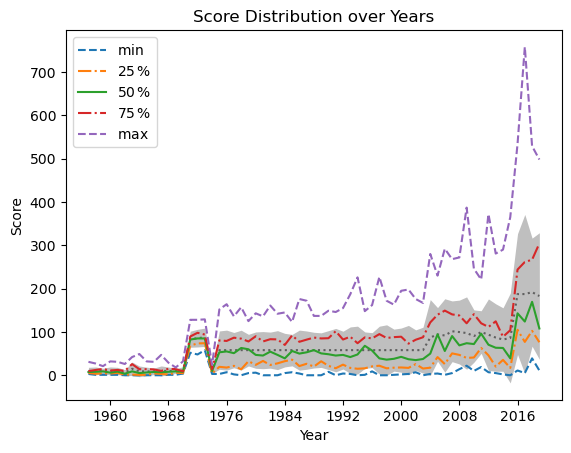

In [28]:
fig = plt.figure(num = 'Scores')
ax = fig.add_subplot(111)

ax.fill_between(
    scores.index,
    scores[('score', 'mean')] + scores[('score', 'std')],
    scores[('score', 'mean')] - scores[('score', 'std')],
    color = 'black',
    linestyle = 'None',
    linewidth = 0,
    alpha = 0.25
)
ax.plot(
    scores.index,
    scores[('score', 'mean')],
    color = 'black',
    marker = 'None',
    linestyle = ':',
    alpha = 0.5
)
ax.plot(
    scores.index,
    scores[('score', 'min')],
    marker = 'None',
    linestyle = '--',
    label = r"$ {\min} $"
)
ax.plot(
    scores.index,
    scores[('score', '25%')],
    marker = 'None',
    linestyle = '-.',
    label = "$ 25 \, \% $"
)
ax.plot(
    scores.index,
    scores[('score', '50%')],
    marker = 'None',
    linestyle = '-',
    label = "$ 50 \, \% $"
)
ax.plot(
    scores.index,
    scores[('score', '75%')],
    marker = 'None',
    linestyle = '-.',
    label = "$ 75 \, \% $"
)
ax.plot(
    scores.index,
    scores[('score', 'max')],
    marker = 'None',
    linestyle = '--',
    label = r"$ {\max} $"
)
ax.legend(loc = 'upper left')
ax.set_title('Score Distribution over Years')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.set_xlabel('Year')
ax.set_ylabel('Score')
plt.show()


In [29]:
tpl.save(figure = fig, filepath = 'scores.tikz')


In [30]:
scores_by_count = df.loc[:, ['year', 'score']].groupby('year').apply(lambda x: np.true_divide(x['score'], x['score'].count())).to_frame().reset_index(level = 0).loc[:, ['year', 'score']].groupby('year').describe()
scores_by_count.sample(12, replace = False, random_state = 2020).sort_index()


score                                                              \
     count      mean       std       min       25%       50%       75%   
year                                                                     
1957  10.0  1.000000  0.831331  0.300000  0.525000  0.750000  0.950000   
1969  16.0  0.625000  0.348359  0.062500  0.359375  0.562500  0.890625   
1970  12.0  0.888889  0.743094  0.333333  0.416667  0.666667  0.750000   
1975  19.0  3.052632  2.331024  0.157895  1.026316  2.789474  4.236842   
1980  19.0  3.052632  2.208646  0.315789  1.263158  2.473684  4.736842   
1982  18.0  3.222222  2.313328  0.000000  1.319444  3.027778  4.625000   
1993  25.0  2.320000  2.142273  0.120000  0.680000  1.680000  3.560000   
1994  25.0  2.320000  2.214919  0.000000  0.600000  1.920000  2.960000   
1999  23.0  2.521739  2.107565  0.043478  0.760870  1.652174  3.826087   
2008  25.0  3.990400  2.947910  0.560000  1.880000  2.760000  5.520000   
2010  25.0  3.619200  2.417854  0.400000  1.640000  2.880000  5.640000   
2014  26.0  3.174556  2.815537  0.076923  1.365385  2.423077  3.413462   

                 
            max  
year             
1957   3.100000  
1969   1.125000  
1970   2.666667  
1975   8.000000  
1980   7.526316  
1982   8.944444  
1993   7.480000  
1994   9.040000  
1999   7.086957  
2008  10.880000  
2010   9.840000  
2014  11.153846

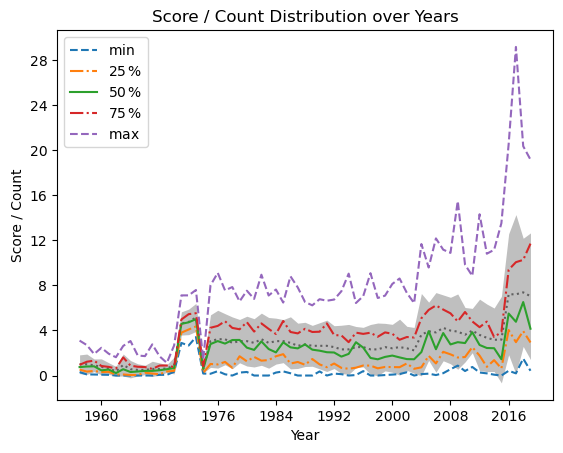

In [31]:
fig = plt.figure(num = 'Scores by Count')
ax = fig.add_subplot(111)

ax.fill_between(
    scores_by_count.index,
    scores_by_count[('score', 'mean')] + scores_by_count[('score', 'std')],
    scores_by_count[('score', 'mean')] - scores_by_count[('score', 'std')],
    color = 'black',
    linestyle = 'None',
    linewidth = 0,
    alpha = 0.25
)
ax.plot(
    scores_by_count.index,
    scores_by_count[('score', 'mean')],
    color = 'black',
    marker = 'None',
    linestyle = ':',
    alpha = 0.5
)
ax.plot(
    scores_by_count.index,
    scores_by_count[('score', 'min')],
    marker = 'None',
    linestyle = '--',
    label = r"$ {\min} $"
)
ax.plot(
    scores_by_count.index,
    scores_by_count[('score', '25%')],
    marker = 'None',
    linestyle = '-.',
    label = "$ 25 \, \% $"
)
ax.plot(
    scores_by_count.index,
    scores_by_count[('score', '50%')],
    marker = 'None',
    linestyle = '-',
    label = "$ 50 \, \% $"
)
ax.plot(
    scores_by_count.index,
    scores_by_count[('score', '75%')],
    marker = 'None',
    linestyle = '-.',
    label = "$ 75 \, \% $"
)
ax.plot(
    scores_by_count.index,
    scores_by_count[('score', 'max')],
    marker = 'None',
    linestyle = '--',
    label = r"$ {\max} $"
)
ax.legend(loc = 'upper left')
ax.set_title('Score / Count Distribution over Years')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.set_xlabel('Year')
ax.set_ylabel('Score / Count')
plt.show()


In [32]:
tpl.save(figure = fig, filepath = 'scores_by_count.tikz')


Both of the tables above display distribution of scores through (selected) years; the plots are related. Difference is that the first one shows absolute scores while the second one shows relative scores&mdash;scores divided by the total number of contestants (or finalists where applicable)<sup>[2](#foot-2)</sup>. As one can see, neither of the tables is constant/consistent, not even in the `mean` column.

The phenomenon observed above suggests that a normalisation of scores is necessary to ensure the meaning of data is somewhat consistent throughout the years (a score of $ 100 $ points had a different meaning in years $ 1980 $ and $ 2010 $). The selected normalisation method is to divide each score by average score in the given year.

---

<a class="anchor" id="foot-2"></a><sup>2</sup> A simple assumption is that, given a fixed set of rules concerning voting and scoring, contestants' scores would be linearly dependent on the number of contestants; in other words, the two would be proportionate. This assumption originates from the original idea of the project, which is a proposition that there exists a predictable common taste in music.


In [33]:
mean_score = df.loc[:, ['year', 'score']].groupby('year').mean().squeeze()
df['nscore'] = df.score / mean_score[df.year].reset_index(drop = True)


Column `nscore` (*normalised score*) is now much more consistent, as we can see below. The first table displays a sample from the dataframe and the second one displays its distribution through years. A plot and a histogram follow the tables.


In [34]:
_sample = df.sample(12, replace = False, random_state = 2020).sort_index()
_sample


,year,country,score,nscore
44,1961,Austria,1,0.100000
51,1961,Luxembourg,31,3.100000
194,1970,Belgium,5,0.468750
279,1975,Germany,15,0.258621
409,1982,Austria,57,0.982759
820,2000,Netherlands,40,0.689655
861,2002,France,104,1.793103
1017,2008,Russia,272,2.726544
1135,2013,Greece,152,1.747126
1190,2015,Israel,97,1.128879


In [35]:
_sample.to_latex('normalised_scores.tex', header = True, index = False)


In [36]:
nscores = df.loc[:, ['year', 'nscore']].groupby('year').describe()
nscores.sample(12, replace = False, random_state = 2020).sort_index()


nscore                                                                 
      count mean       std       min       25%       50%       75%       max
year                                                                        
1957   10.0  1.0  0.831331  0.300000  0.525000  0.750000  0.950000  3.100000
1969   16.0  1.0  0.557375  0.100000  0.575000  0.900000  1.425000  1.800000
1970   12.0  1.0  0.835981  0.375000  0.468750  0.750000  0.843750  3.000000
1975   19.0  1.0  0.763611  0.051724  0.336207  0.913793  1.387931  2.620690
1980   19.0  1.0  0.723522  0.103448  0.413793  0.810345  1.551724  2.465517
1982   18.0  1.0  0.717930  0.000000  0.409483  0.939655  1.435345  2.775862
1993   25.0  1.0  0.923394  0.051724  0.293103  0.724138  1.534483  3.224138
1994   25.0  1.0  0.954707  0.000000  0.258621  0.827586  1.275862  3.896552
1999   23.0  1.0  0.835758  0.017241  0.301724  0.655172  1.517241  2.810345
2008   25.0  1.0  0.738750  0.140337  0.471131  0.691660  1.383320  2.726544
2010   25.0  1.0  0.668063  0.110522  0.453139  0.795756  1.558355  2.718833
2014   26.0  1.0  0.886907  0.024231  0.430103  0.763281  1.075256  3.513514

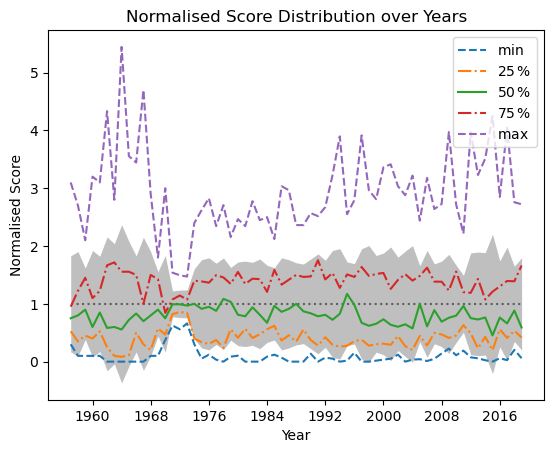

In [37]:
fig = plt.figure(num = 'Normalised Scores')
ax = fig.add_subplot(111)

ax.fill_between(
    nscores.index,
    nscores[('nscore', 'mean')] + nscores[('nscore', 'std')],
    nscores[('nscore', 'mean')] - nscores[('nscore', 'std')],
    color = 'black',
    linestyle = 'None',
    linewidth = 0,
    alpha = 0.25
)
ax.plot(
    nscores.index,
    nscores[('nscore', 'mean')],
    color = 'black',
    marker = 'None',
    linestyle = ':',
    alpha = 0.5
)
ax.plot(
    nscores.index,
    nscores[('nscore', 'min')],
    marker = 'None',
    linestyle = '--',
    label = r"$ {\min} $"
)
ax.plot(
    nscores.index,
    nscores[('nscore', '25%')],
    marker = 'None',
    linestyle = '-.',
    label = "$ 25 \, \% $"
)
ax.plot(
    nscores.index,
    nscores[('nscore', '50%')],
    marker = 'None',
    linestyle = '-',
    label = "$ 50 \, \% $"
)
ax.plot(
    nscores.index,
    nscores[('nscore', '75%')],
    marker = 'None',
    linestyle = '-.',
    label = "$ 75 \, \% $"
)
ax.plot(
    nscores.index,
    nscores[('nscore', 'max')],
    marker = 'None',
    linestyle = '--',
    label = r"$ {\max} $"
)
ax.legend(loc = 'upper right')
ax.set_title('Normalised Score Distribution over Years')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.set_xlabel('Year')
ax.set_ylabel('Normalised Score')
plt.show()


In [38]:
tpl.save(figure = fig, filepath = 'normalised_scores.tikz')


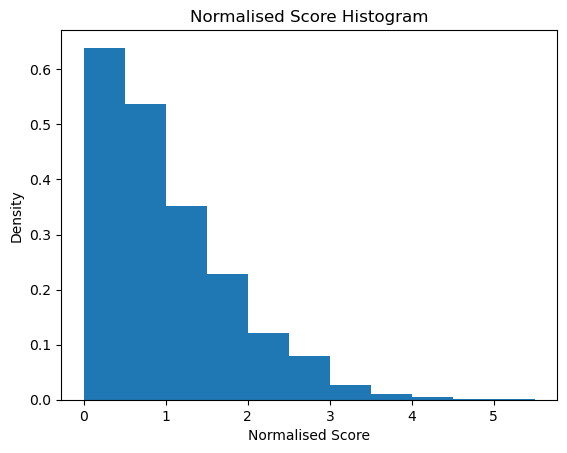

In [39]:
fig = plt.figure(num = 'Normalised Scores Histogram')
ax = fig.add_subplot(111)

ax.hist(df.nscore, bins = np.linspace(0.0, 5.5, num = 12), density = True)
ax.set_title('Normalised Score Histogram')
ax.set_xlabel('Normalised Score')
ax.set_ylabel('Density')
plt.show()


In [40]:
tpl.save(figure = fig, filepath = 'normalised_scores_histogram.tikz')


## Numbers of Contestants
<a class="anchor" id="sec-number-of-contestants"></a>


Let us count how many contestants were in each year. This is not actually transformation of the dataframe, but this information will be used in other parts of the project.


In [41]:
count = df.loc[:, ['year', 'country']].groupby('year').count().rename({'country': 'n'}, axis = 1)


In [42]:
count.sample(12, replace = False, random_state = 2020).sort_index()


,n
year,
1957,10
1969,16
1970,12
1975,19
1980,19
1982,18
1993,25
1994,25
1999,23


In [43]:
count.describe()


,n
count,63.000000
mean,20.761905
std,4.402031
min,10.000000
25%,18.000000
50%,22.000000
75%,25.000000
max,27.000000


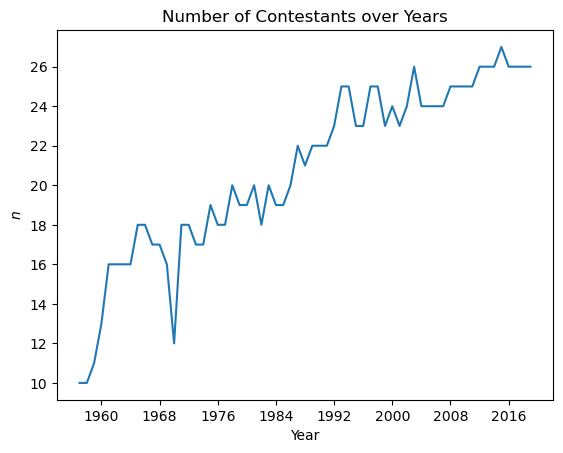

In [44]:
fig = plt.figure(num = 'Numbers of Contestants')
ax = fig.add_subplot(111)

ax.plot(
    count.index,
    count['n'],
    marker = 'None',
    linestyle = '-'
)
ax.set_title('Number of Contestants over Years')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.set_xlabel('Year')
ax.set_ylabel("$ n $")
plt.show()


In [45]:
tpl.save(figure = fig, filepath = 'numbers_of_contestants.tikz')


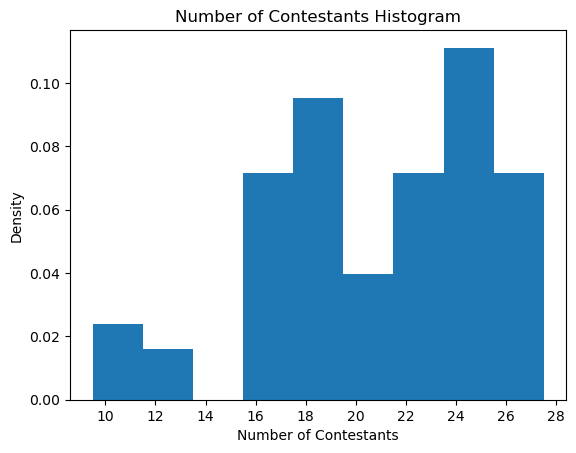

In [46]:
fig = plt.figure(num = 'Scores')
ax = fig.add_subplot(111)

ax.hist(count['n'], bins = np.linspace(9.5, 27.5, num = 10), density = True)
ax.set_title('Number of Contestants Histogram')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer = True))
ax.set_xlabel('Number of Contestants')
ax.set_ylabel('Density')
plt.show()


## Computing Additional Data
<a class="anchor" id="sec-computing-additional-data"></a>


Before the end, we may compute some additional data, such as rank lists through years, winners etc. Along the *ordinary* rank lists, *differential* rank lists shall be computed as well. It is worth defining them now.

**Definition.** For a bounded list of scores $ S = \left( s_{1} , s_{2} , \dotsc , s_{n} , \dotsc \right) $, the *ascending differential rank* of the $ i $-th score is defined as $ s_{i} - \min \left( S \right) $ and the *descending differential rank* is defined as $ \max \left( S \right) - s_{i} $.

Of course, we shall only observe the descending rank lists (the highest score receives the lowest rank) hence the modifier *descending* may be omitted. Note that the highest (best) score receives rank $ 0 $ when observing the differential rank list. This shall be extended to ordinary rank lists as well, for the sake of consistency. To compute the rank lists, customly implemented functions `utils.rank_list` and `utils.rank_list_diff` functions shall be used.


In [47]:
df = pd.merge(
    df,
    df.groupby('year').apply(
        lambda dfy: pd.DataFrame(
            {
                'rank': utils.rank_list(dfy.score, mode = 'center'),
                'rank_count': utils.rank_list(dfy.score, mode = 'count'),
                'rank_inc': utils.rank_list(dfy.score, mode = 'inc'),
                'rank_diff': utils.rank_list_diff((dfy.nscore)) / \
                    dfy.nscore.std()
            },
            index = dfy.index
        )
    ),
    left_index = True,
    right_index = True
).reset_index(drop = True)


In [48]:
df.loc[df.year == 2019].sort_values(by = 'score', ascending = False)


,year,country,score,nscore,rank,rank_count,rank_inc,rank_diff
1297,2019,Netherlands,498,2.722456,0.0,0,0,0.000000
1295,2019,Italy,472,2.580320,1.0,1,1,0.177989
1300,2019,Russia,370,2.022708,2.0,2,2,0.876254
1306,2019,Switzerland,364,1.989907,3.0,3,3,0.917328
1305,2019,Sweden,334,1.825904,4.0,4,4,1.122700
1299,2019,Norway,331,1.809504,5.0,5,5,1.143237
1298,2019,North Macedonia,305,1.667368,6.0,6,6,1.321226
1284,2019,Azerbaijan,302,1.650967,7.0,7,7,1.341764
1283,2019,Australia,284,1.552565,8.0,8,8,1.464987
1293,2019,Iceland,232,1.268293,9.0,9,9,1.820965


Columns `rank`, `rank_count`, `rank_inc` and `rank_diff` all define a rank list within a yearly eddition of the [Contest](http://eurovision.tv/), but they are computed differently:

*   `rank`
    *   The highest score receives rank $ 0 $, the next receives rank $ 1 $ and so on.
    *   If $ n $ scores are *competing* for the rank $ i $ (there is a tie amongst them), each of them receives rank $ \frac{i + \left( i + 1 \right) + \dotsb + \left( i + n - 1 \right)}{n} = i + \frac{n - 1}{2} $ (the mean of $ n $ consecutive ranks starting with $ i $).
    *   The rank following a tie is $ i + n $ (which may be adapted analogously if there is a tie again).
    *   Consequently, ranks in a tie are exactly in the middle between the immediately preceeding and following ranks (if such exist and are not in a tie). However, this is also true for `rank_inc` (minus the part about the neighbouring ties), but the choice for the next rank is in common with `rank_count`, making this ranking list a compromise between the two.
*   `rank_count`
    *   The highest score receives rank $ 0 $, the next receives rank $ 1 $ and so on.
    *   If $ n $ scores are *competing* for the rank $ i $ (there is a tie amongst them), each of them receives rank $ i $.
    *   The rank following a tie is $ i + n $.
    *   Consequently, the rank is equal to the total number of scores (strictly) larger than the observed score.
*   `rank_inc`
    *   The highest score receives rank $ 0 $, the next receives rank $ 1 $ and so on.
    *   If $ n $ scores are *competing* for the rank $ i $ (there is a tie amongst them), each of them receives rank $ i $.
    *   The rank following a tie is $ i + 1 $ (regardless of the value of $ n $).
    *   Consequently, the rank is equal to the total number of distinct scores (strictly) larger than the observed score.
*   `rank_diff`
    *   This is the differential rank list of the column `nscore` divided by the standard deviation of the column. Consequently:
        *   The highest score receives rank $ 0 $. Difference in scores is equal to difference in ranks divided by the standard deviation of scores (normalised or not). Difference in ranks is proportional to the difference in scores (normalised or not).
        *   Same scores receive same ranks.
        *   The number of scores in a tie does not (explicitly) determine the rank following the tie.


Finally, some aggregated values observed earlier may be useful afterwards and it might be a good idea to extract them in a new dataframe called `summary` to avoid computing the values every time they are needed.


In [49]:
summary = df.groupby('year').apply(
    lambda dfy: pd.concat(
        (
            dfy.loc[dfy.score.idxmax(), ['country', 'score', 'nscore']],
            pd.Series(
                {
                    'score_mean': dfy.score.mean(),
                    'score_std': dfy.score.std(),
                    'nscore_mean': dfy.nscore.mean(),
                    'nscore_std': dfy.nscore.std(),
                    'count': dfy.shape[0]
                }
            )
        )
    )
).rename(
    {
        'country': 'winner',
        'score': 'winning',
        'nscore': 'nwinning'
    },
    axis = 1
).reset_index(drop = False)
summary['count'] = summary['count'].astype(np.int64)
summary = summary[
    [
        'year',
        'count',
        'winner',
        'winning',
        'nwinning',
        'score_mean',
        'score_std',
        'nscore_mean',
        'nscore_std'
    ]
].copy(deep = True)


In [50]:
summary.sample(12, replace = False, random_state = 2020).sort_index()


,year,count,winner,winning,nwinning,score_mean,score_std,nscore_mean,nscore_std
0,1957,10,Netherlands,31,3.100000,10.000000,8.313309,1.0,0.831331
12,1969,16,France,18,1.800000,10.000000,5.573748,1.0,0.557375
13,1970,12,Ireland,32,3.000000,10.666667,8.917127,1.0,0.835981
18,1975,19,Netherlands,152,2.620690,58.000000,44.289452,1.0,0.763611
23,1980,19,Ireland,143,2.465517,58.000000,41.964271,1.0,0.723522
25,1982,18,Germany,161,2.775862,58.000000,41.639913,1.0,0.717930
36,1993,25,Ireland,187,3.224138,58.000000,53.556823,1.0,0.923394
37,1994,25,Ireland,226,3.896552,58.000000,55.372978,1.0,0.954707
42,1999,23,Sweden,163,2.810345,58.000000,48.473986,1.0,0.835758
51,2008,25,Russia,272,2.726544,99.760000,73.697739,1.0,0.738750


## Saving Transformed Data
<a class="anchor" id="sec-saving-transformed-data"></a>


The only thing left to do is to save the resulting dataframes to external memory. We shall save the dataframes in the same directory where raw data is.


In [51]:
df.to_csv(
    'data/scores.csv',
    sep = ';',
    float_format = '%.8f',
    header = True,
    index = False,
    encoding = 'ascii',
    quoting = csv.QUOTE_NONNUMERIC,
    decimal = ','
)
summary.to_csv(
    'data/summary.csv',
    sep = ';',
    float_format = '%.8f',
    header = True,
    index = False,
    encoding = 'ascii',
    quoting = csv.QUOTE_NONNUMERIC,
    decimal = ','
)


## References
<a class="anchor" id="sec-references"></a>


1.  <a class="anchor" id="bib-EVWScores"></a>Eurovisionworld, *Eurovision voting &amp; points*, Web page, Eurovisionworld, 2020. [Online]. Available: [http://eurovisionworld.com/eurovision](http://eurovisionworld.com/eurovision) (visited on 15/12/2020).
2.  <a class="anchor" id="bib-Flecht2020"></a>M. Flecht, *Eurovision Song Contest database*, Web page, Köln, 2020. [Online]. Available: [http://eschome.net/](http://eschome.net/) (visited on 15/12/2020).
3.  <a class="anchor" id="bib-Okhuijsen2019"></a>S. Okhuijsen, *Eurovision Song Contest scores $ 1975 $&ndash;$ 2019 $*, Web page, Utrecht: Datagraver, 2019. [Online]. Available: [http://data.world/datagraver/eurovision-song-contest-scores-1975-2019](http://data.world/datagraver/eurovision-song-contest-scores-1975-2019) (visited on 19/08/2020).
